In [1]:
# Install seaborn (as well as any other required libraries)
#%pip install seaborn matplotlib scipy scikit-learn

# Basic data handling and I/O
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
from scipy.io import arff
from sklearn.preprocessing import StandardScaler

# Feature selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

# Model evaluation and splitting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings for clean output (optional)
import warnings
warnings.filterwarnings('ignore')

# Set visual aesthetics for plots (optional)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 8)


In [2]:
# Install necessary libraries if needed
#%pip install scipy pandas

# Load ARFF files using scipy
from scipy.io import arff
import pandas as pd

# Load a specific ARFF file (replace with the correct filename as needed)
data_1year, meta_1year = arff.loadarff('/Users/poojithramagiri/Desktop/ML Challenges/polish+companies+bankruptcy+data/1year.arff')
df_1year = pd.DataFrame(data_1year)

# Convert binary classification column to strings for clarity
df_1year['class'] = df_1year['class'].apply(lambda x: x.decode('utf-8'))

# Check the first few rows
print(df_1year.head())


      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  class  
0   82.

In [13]:
df_1year.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [4]:
df_1year.shape

(7027, 65)

In [5]:
# Checking for null values and data types
print(df_1year.info())
print("\nMissing values per column:")
print(df_1year.isnull().sum())
#show in percentage type how many null values are present in the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7024 non-null   float64
 1   Attr2   7024 non-null   float64
 2   Attr3   7024 non-null   float64
 3   Attr4   6997 non-null   float64
 4   Attr5   7019 non-null   float64
 5   Attr6   7024 non-null   float64
 6   Attr7   7024 non-null   float64
 7   Attr8   7002 non-null   float64
 8   Attr9   7026 non-null   float64
 9   Attr10  7024 non-null   float64
 10  Attr11  6988 non-null   float64
 11  Attr12  6997 non-null   float64
 12  Attr13  7027 non-null   float64
 13  Attr14  7024 non-null   float64
 14  Attr15  7025 non-null   float64
 15  Attr16  7002 non-null   float64
 16  Attr17  7002 non-null   float64
 17  Attr18  7024 non-null   float64
 18  Attr19  7027 non-null   float64
 19  Attr20  7027 non-null   float64
 20  Attr21  5405 non-null   float64
 21  Attr22  7024 non-null   float64
 22  

Data Preprocessing 

In [15]:
# Step 1: Handle missing values
# Calculate median only for numeric columns and fill missing values
numeric_cols = df_1year.select_dtypes(include=[np.number]).columns
df_1year_clean = df_1year.copy()
df_1year_clean[numeric_cols] = df_1year[numeric_cols].fillna(df_1year[numeric_cols].median())

# Step 2: Label encoding is not required as class labels are already in binary form

# Step 3: Feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Identify features to scale (excluding the class column)
feature_columns = df_1year_clean.columns.difference(['class'])

# Fit and transform the features
scaled_features = scaler.fit_transform(df_1year_clean[feature_columns])

# Create a new DataFrame with the scaled features
df_1year_scaled = pd.DataFrame(scaled_features, columns=feature_columns)

# Re-add the class column
df_1year_scaled['class'] = df_1year_clean['class']

# Check the preprocessed dataset
df_1year_scaled.head(5)


,Attr1,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,...,Attr6,Attr60,Attr61,Attr62,Attr63,Attr64,Attr7,Attr8,Attr9,class
0,0.036342,-0.039032,-0.011957,-0.025952,-0.012066,-0.007666,-0.015554,-0.024157,-0.057036,-0.007666,...,0.054313,-0.016091,-0.040126,-0.015062,-0.185384,-0.039064,-0.007666,-0.068961,-0.043276,0
1,0.038220,-0.039241,-0.010639,-0.052908,-0.012117,-0.006639,-0.013402,-0.059143,-0.089605,-0.006639,...,-0.009867,-0.016256,-0.047265,-0.014982,-0.236294,-0.028619,-0.006639,-0.086873,-0.037778,0
2,0.046883,-0.044970,-0.004681,-0.029337,-0.011579,-0.000565,-0.012017,-0.073247,-0.118540,-0.000565,...,-0.009867,-0.016224,-0.044669,-0.014895,-0.270449,-0.039497,-0.000565,-0.116811,-0.041608,0
3,0.010255,-0.037004,-0.030147,-0.093469,-0.012519,-0.026473,-0.010553,-0.084273,-0.025267,-0.026473,...,0.014910,-0.016240,-0.045957,-0.015049,-0.195057,-0.039430,-0.026473,-0.040279,-0.044078,0
4,0.033443,-0.042525,-0.019189,-0.087844,-0.012346,-0.015143,-0.007976,-0.097866,-0.108590,-0.015143,...,0.021099,-0.016169,-0.043272,-0.014918,-0.262896,-0.038972,-0.015143,-0.106436,-0.043109,0


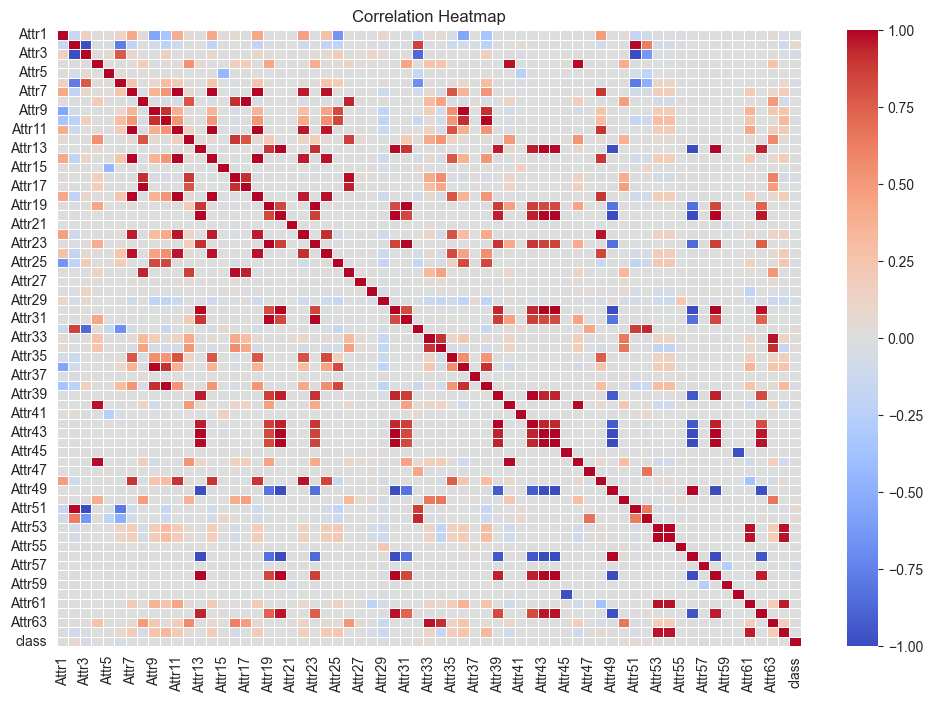

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = df_1year.corr()
#upload correlation matrix to csv file. 
correlation_matrix.to_csv('correlationmatrix.csv')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# Display correlations of all features with 'class'
feature_correlations_with_class = correlation_matrix['class'].drop('class')  # Exclude self-correlation of class
print("Correlations of features with class:\n", feature_correlations_with_class.sort_values(key=abs, ascending=False))


Correlations of features with class:
 Attr2     0.065151
Attr3    -0.065103
Attr51    0.064747
Attr57   -0.060031
Attr6    -0.052310
            ...   
Attr5    -0.002015
Attr39   -0.001853
Attr42   -0.001840
Attr17   -0.000122
Attr8    -0.000089
Name: class, Length: 64, dtype: float64


Observations and Implications

Low Correlation Values:
The highest correlations are just above 0.06 in absolute terms, which is relatively low. This suggests that any single feature alone may not be very predictive of the class (bankruptcy status).

Direction of Correlations:
Positive Correlation (e.g., Attr2, Attr51): As the value of these features increases, the likelihood of bankruptcy (class=1) slightly increases.
Negative Correlation (e.g., Attr3, Attr57): As the value of these features increases, the likelihood of bankruptcy decreases.

Top Correlated Features:
Attr2 (Positive): Slightly more correlated than others, may suggest that as it increases, the financial distress or risk of bankruptcy increases.
Attr3 (Negative): Suggests that higher values of Attr3 might be associated with financial stability or a lower risk of bankruptcy.

In [18]:
# Identifying feature pairs
important_pairs = []
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if abs(correlation_matrix.loc[idx, col]) > 0.7 and idx != col:  # adjust threshold as needed
            important_pairs.append((idx, col, correlation_matrix.loc[idx, col]))

# Print sorted pairs by correlation strength
important_pairs_sorted = sorted(important_pairs, key=lambda x: -abs(x[2]))
for pair in important_pairs_sorted[:]:  # Limit to top 10 pairs
    print(f"Feature Pair: {pair[0]}, {pair[1]} - Correlation: {pair[2]:.2f}")


Feature Pair: Attr14, Attr7 - Correlation: 1.00
Feature Pair: Attr18, Attr7 - Correlation: 1.00
Feature Pair: Attr7, Attr14 - Correlation: 1.00
Feature Pair: Attr18, Attr14 - Correlation: 1.00
Feature Pair: Attr7, Attr18 - Correlation: 1.00
Feature Pair: Attr14, Attr18 - Correlation: 1.00
Feature Pair: Attr58, Attr56 - Correlation: -1.00
Feature Pair: Attr56, Attr58 - Correlation: -1.00
Feature Pair: Attr56, Attr20 - Correlation: -1.00
Feature Pair: Attr20, Attr56 - Correlation: -1.00
Feature Pair: Attr58, Attr20 - Correlation: 1.00
Feature Pair: Attr20, Attr58 - Correlation: 1.00
Feature Pair: Attr38, Attr10 - Correlation: 1.00
Feature Pair: Attr10, Attr38 - Correlation: 1.00
Feature Pair: Attr31, Attr19 - Correlation: 1.00
Feature Pair: Attr19, Attr31 - Correlation: 1.00
Feature Pair: Attr44, Attr43 - Correlation: 1.00
Feature Pair: Attr43, Attr44 - Correlation: 1.00
Feature Pair: Attr54, Attr53 - Correlation: 1.00
Feature Pair: Attr53, Attr54 - Correlation: 1.00
Feature Pair: Attr36

Analysis of Feature Pairs

Perfect Positive Correlation (Correlation: 1.00)
Pairs: Attr18 with Attr14, Attr7 with Attr14, and Attr7 with Attr18
Implication: These features provide identical information since they are perfectly correlated. This means including all these features in a model would be redundant. Typically, you would choose one from each pair to include in any predictive models to avoid multicollinearity, which can skew the results of models like linear regression.

Perfect Negative Correlation (Correlation: -1.00)
Pairs: Attr58 with Attr56, and Attr56 with Attr20
Implication: These features move exactly in opposite directions and hence are perfectly inversely related. This kind of relationship indicates that one feature's value can be perfectly predicted from the other, and thus only one of them should be used in a predictive model to avoid multicollinearity.

BOX PLOTS

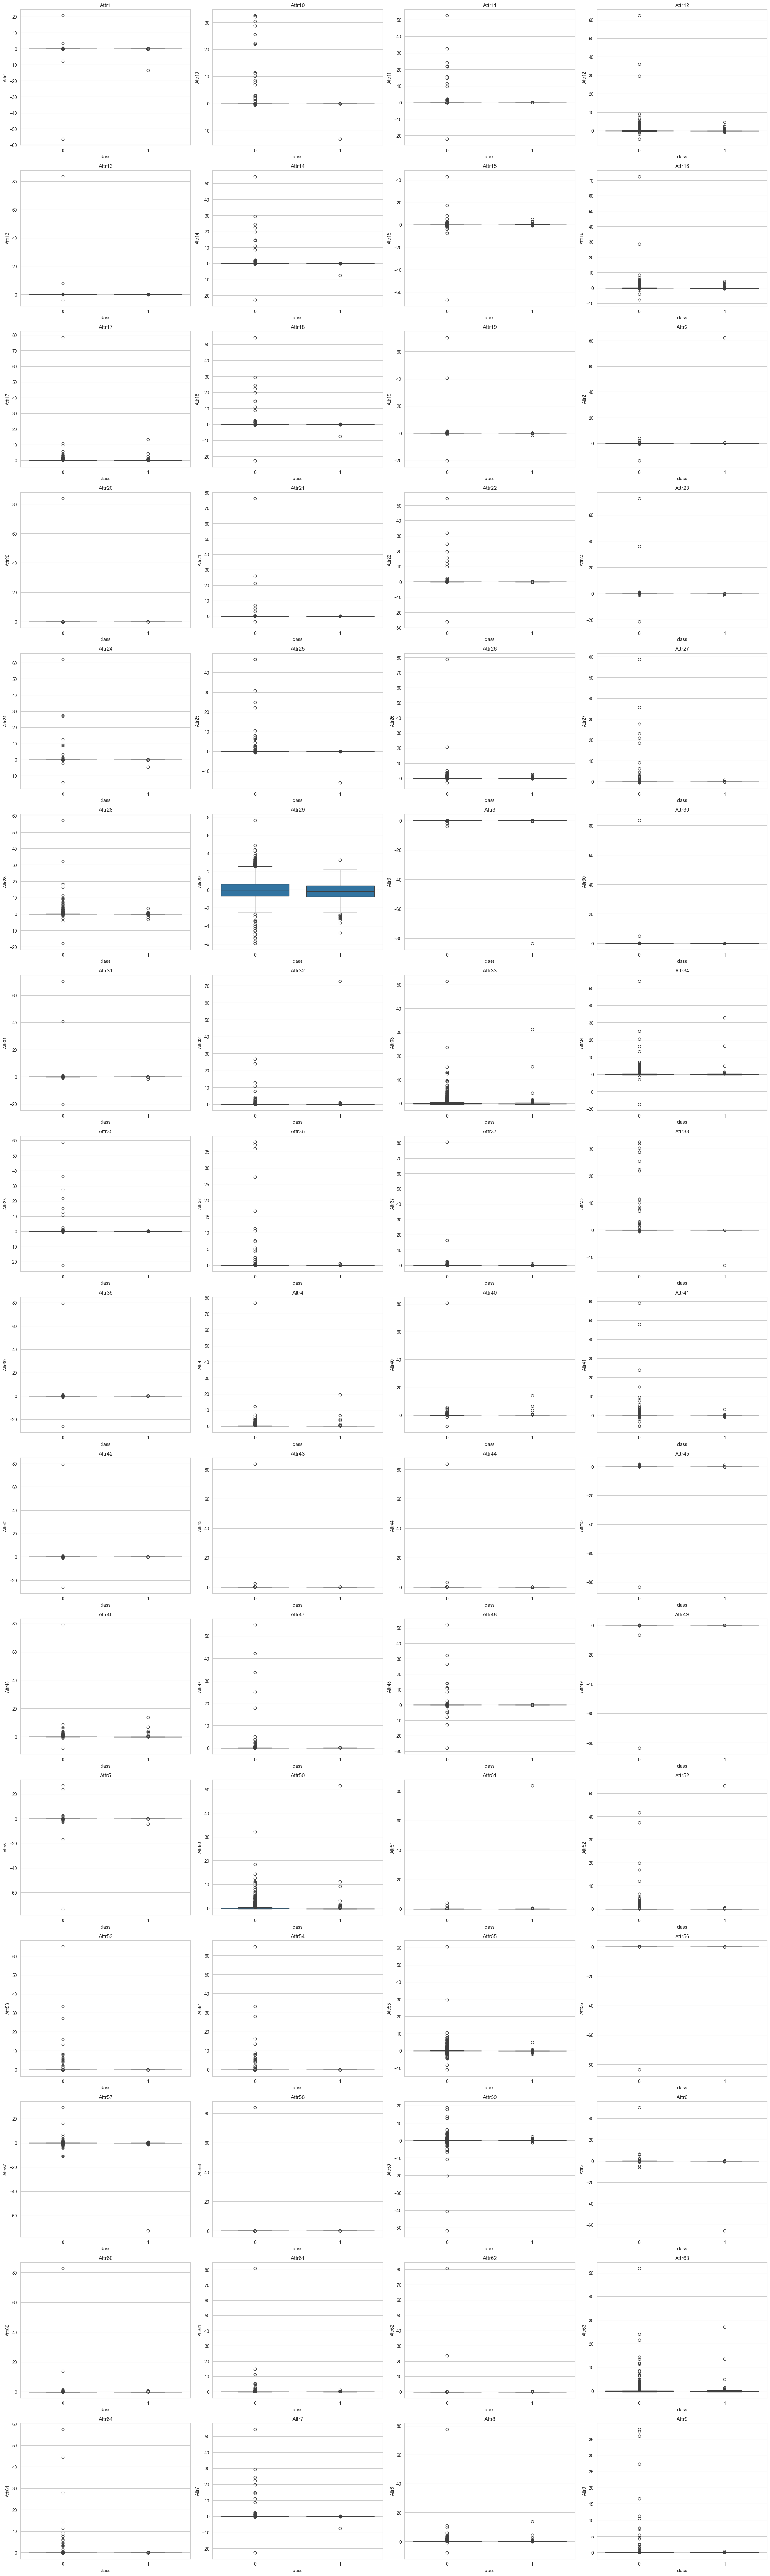

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_1year_scaled is your preprocessed and scaled dataframe
# df_1year_scaled = ...

plt.figure(figsize=(24, 80))  # Adjust the figure size for better visualization

# Loop through each attribute column and create a boxplot
for i, col in enumerate(df_1year_scaled.columns[:-1]):  # Exclude the class column
    plt.subplot(16, 4, i + 1)  # Create a subplot for each feature
    sns.boxplot(x='class', y=col, data=df_1year_scaled)
    plt.title(col)

plt.tight_layout()  # Adjust subplots to fit in figure area.
plt.show()
